In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("YRD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [24]:
n_lags = 7
for i in range(1, n_lags + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)


In [25]:
df.dropna(inplace=True)

In [26]:
X = df[[f'lag_{i}' for i in range(1, n_lags + 1)]].values
y = df['Close'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
train_pred = model.predict(X_train)
predicted = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

In [31]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.1983
Mean Absolute Error: 0.3307
R² Score: 0.9838


In [32]:
train_dates = df.index[n_lags:len(X_train)+n_lags]
test_dates = df.index[-len(y_test):]


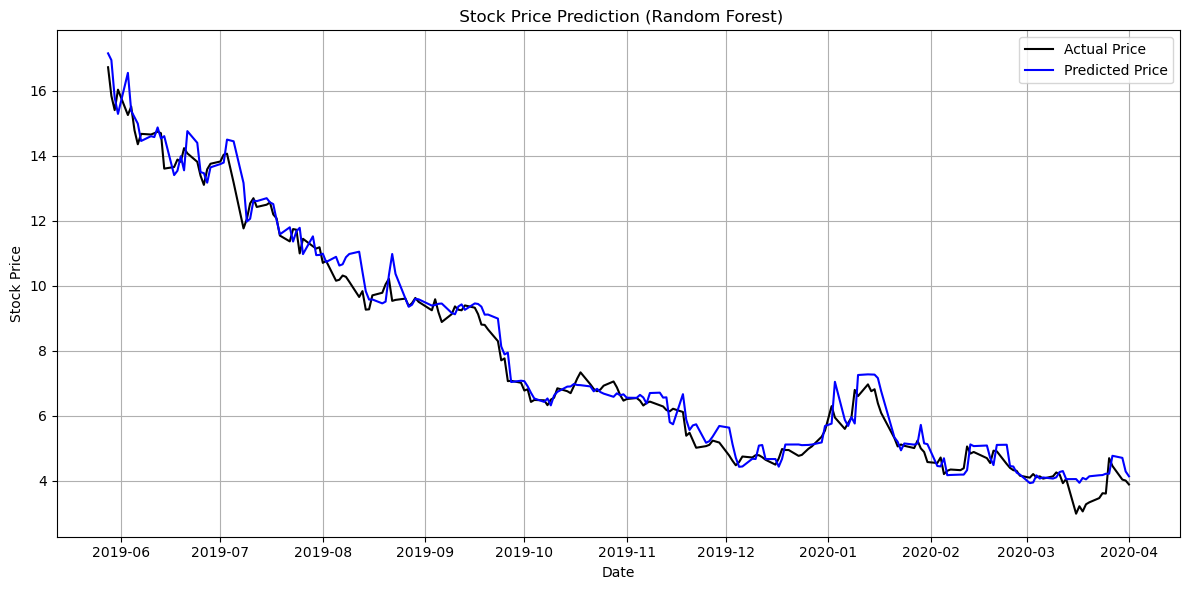

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Price', color='black')
plt.plot(test_dates, predicted, label='Predicted Price', color='blue')
plt.title(' Stock Price Prediction (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

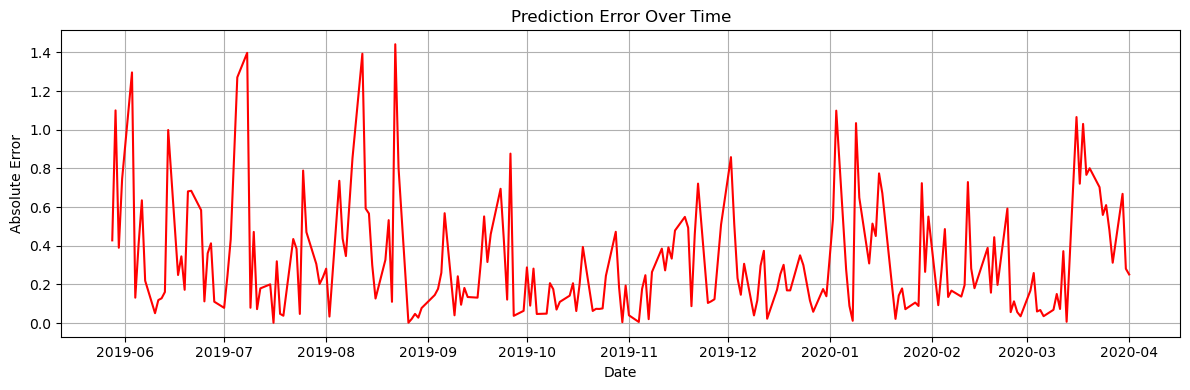

In [35]:
errors = np.abs(y_test - predicted)
plt.figure(figsize=(12, 4))
plt.plot(test_dates, errors, label='Absolute Error', color='red')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.tight_layout()
plt.show()


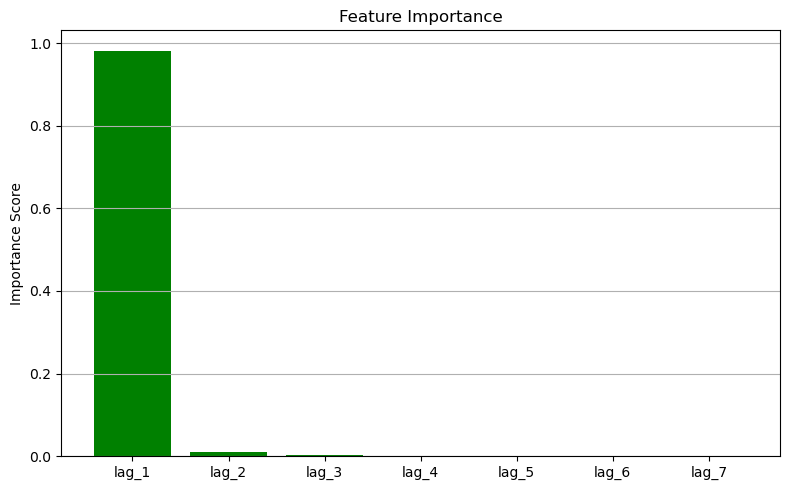

In [37]:
importances = model.feature_importances_
lags = [f'lag_{i}' for i in range(1, n_lags + 1)]
plt.figure(figsize=(8, 5))
plt.bar(lags, importances, color='green')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

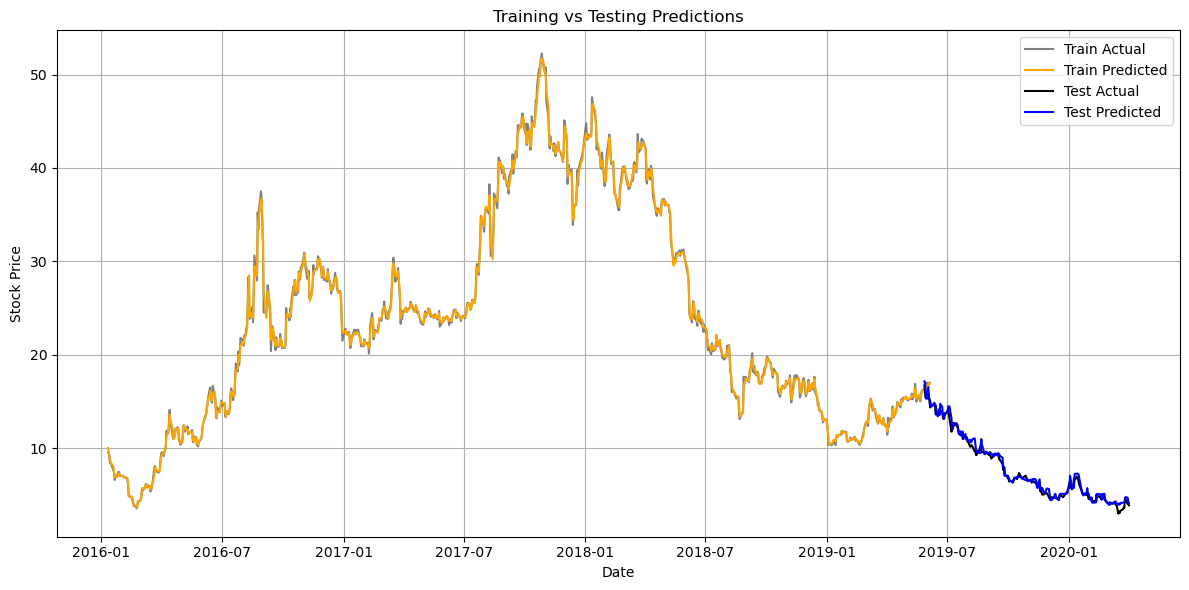

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Train Actual', color='gray')
plt.plot(train_dates, train_pred, label='Train Predicted', color='orange')
plt.plot(test_dates, y_test, label='Test Actual', color='black')
plt.plot(test_dates, predicted, label='Test Predicted', color='blue')
plt.title('Training vs Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()